In [3]:
import pandas as pd
import numpy as np
from collections import Counter
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA

In [4]:
warnings.filterwarnings('ignore')

## Plot functions

In [18]:
def draw_corr_mat(df):
    plt.figure(figsize=(10, 8))
    cor = df.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

## Exploratory data analysis

In [19]:
df_x = pd.read_excel('data/X_4_12.xlsx', 
                   header=None)
df_y = pd.read_excel('data/Y_4_12.xlsx', 
                   header=None)

### X_4_12 data

In [20]:
df_x.head()

,0,1,2,3
0,0.713168,-1.155396,4.892525,-4.179356
1,0.180207,-0.951694,3.215496,-3.035290
2,-0.160125,-1.056572,2.849464,-3.009590
3,0.135208,-0.901885,2.976070,-2.840862
4,0.951132,-0.891886,4.577923,-3.626791


In [21]:
df_x.describe()

,0,1,2,3
count,200.000000,200.000000,200.000000,200.000000
mean,-1.041891,-1.023640,0.987137,-2.029028
std,2.724895,1.204667,2.710166,1.666720
min,-5.872689,-3.080677,-3.682738,-5.035222
25%,-3.138779,-1.932904,-1.184310,-3.369372
50%,-0.982649,-0.999337,0.944718,-2.040614
75%,1.035388,-0.066414,3.198369,-0.703692
max,3.930430,1.179921,5.905926,1.051648


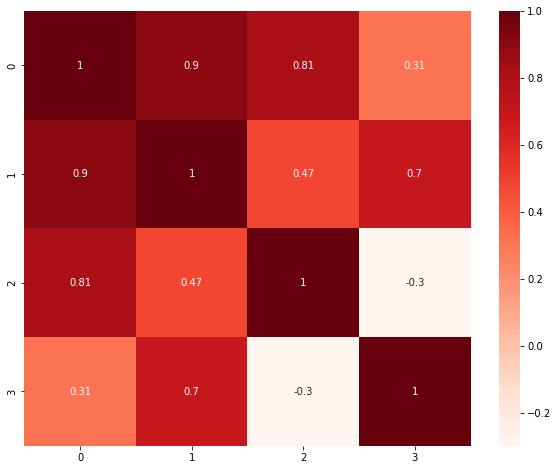

In [22]:
draw_corr_mat(df_x)

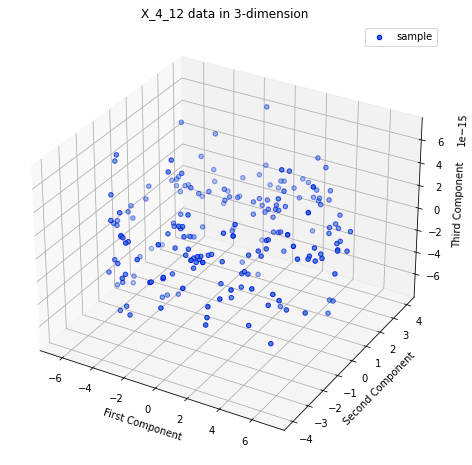

In [23]:
pca_x = PCA(n_components=3)
pca_x.fit(df_x)
res_pca_x = np.array(pca_x.transform(df_x))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(res_pca_x[:, 0], res_pca_x[:, 1], res_pca_x[:, 2], label='sample', edgecolors='blue')
plt.legend()
ax.set_ylabel('Second Component')
ax.set_xlabel('First Component')
ax.set_zlabel('Third Component')
plt.title('X_4_12 data in 3-dimension')
plt.show()

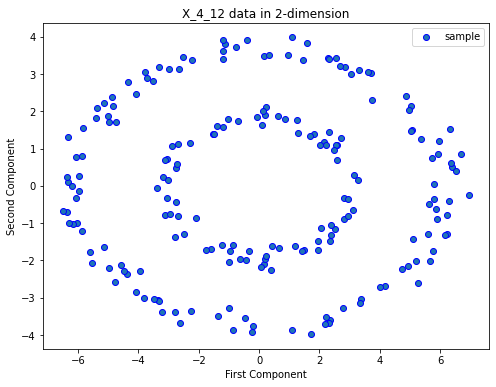

In [40]:
pca_x = PCA(n_components=2)
pca_x.fit(df_x)
res_pca_x = np.array(pca_x.transform(df_x))
plt.figure(figsize=(8, 6))
plt.scatter(res_pca_x[:, 0], res_pca_x[:, 1], label='sample', edgecolors='blue')
plt.legend()
plt.ylabel('Second Component')
plt.xlabel('First Component')
plt.title('X_4_12 data in 2-dimension')
plt.show()

### Y_4_12 data

In [41]:
df_y.head()

,0,1,2,3
0,0.949997,-0.178492,-0.129891,1.067448
1,1.182598,0.124944,0.179682,1.080319
2,1.986758,0.917291,1.891755,0.942933
3,1.159683,1.187749,0.775773,1.105749
4,1.981371,0.926145,2.165250,1.282681


In [42]:
df_y.describe()

,0,1,2,3
count,200.000000,200.000000,200.000000,200.000000
mean,1.331577,0.647711,0.974792,0.991910
std,0.491012,0.504300,0.866040,0.165052
min,0.651068,-0.592140,-0.355696,0.435252
25%,0.951138,0.147654,0.068272,0.911239
50%,1.097644,0.908226,0.975041,1.002791
75%,1.899907,1.033586,1.881851,1.090635
max,2.203044,1.363924,2.427703,1.433292


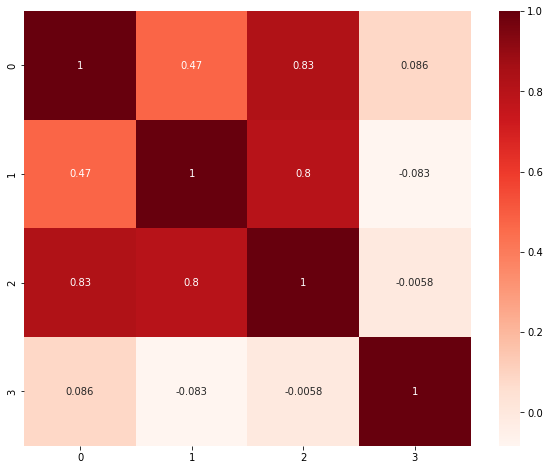

In [33]:
draw_corr_mat(df_y)

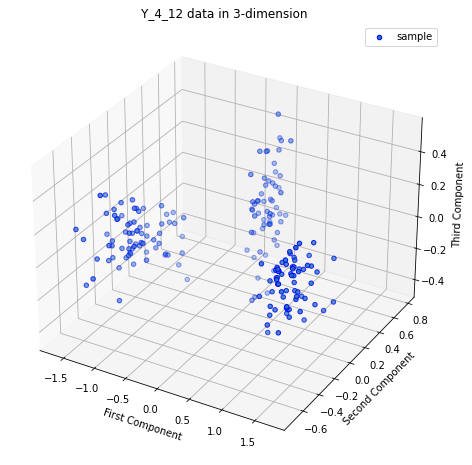

In [48]:
pca_y_3 = PCA(n_components=3)
pca_y_3.fit(df_y)
res_pca_y_3 = np.array(pca_y_3.transform(df_y))
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(res_pca_y_3[:, 0], res_pca_y_3[:, 1], res_pca_y_3[:, 2], label='sample', edgecolors='blue')
plt.legend()
ax.set_ylabel('Second Component')
ax.set_xlabel('First Component')
ax.set_zlabel('Third Component')
plt.title('Y_4_12 data in 3-dimension')
plt.show()

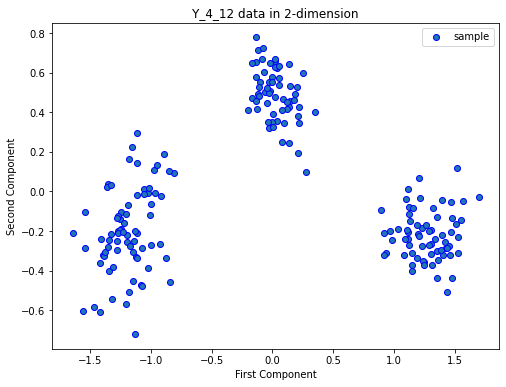

In [49]:
pca_y = PCA(n_components=2)
pca_y.fit(df_y)
res_pca_y = np.array(pca_y.transform(df_y))
plt.figure(figsize=(8, 6))
plt.scatter(res_pca_y[:, 0], res_pca_y[:, 1], label='sample', edgecolors='blue')
plt.legend()
plt.ylabel('Second Component')
plt.xlabel('First Component')
plt.title('Y_4_12 data in 2-dimension')
plt.show()

## Data preparation

### 1. Distance matrix

**using Euclidian distance**

In [51]:
from scipy.spatial.distance import pdist,squareform

In [52]:
x_dist_matrix = pd.DataFrame(squareform(pdist(df_x, metric='euclidean')))
x_dist_matrix

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,2.108757,2.512938,2.421296,0.728263,1.319181,2.244050,2.028968,2.440083,2.263161,...,3.116683,1.226785,0.889753,2.923173,1.032964,0.654096,2.637002,0.396201,0.091691,2.562195
1,2.108757,0.000000,0.511336,0.315647,1.674510,2.735786,0.455636,0.426654,0.366568,0.419768,...,1.513200,1.979288,1.814030,1.038095,1.797528,1.727008,0.627657,1.946647,2.070634,0.453574
2,2.512938,0.511336,0.000000,0.394523,2.151865,3.234514,0.839563,0.902806,0.512725,0.788887,...,1.048953,2.156050,2.070751,0.529903,2.021513,2.045489,0.125641,2.296583,2.463507,0.360689
3,2.421296,0.315647,0.394523,0.000000,1.962001,2.995142,0.456640,0.564565,0.121992,0.404817,...,1.440685,2.266970,2.119028,0.895232,2.095807,2.040448,0.465500,2.262186,2.384605,0.145636
4,0.728263,1.674510,2.151865,1.962001,0.000000,1.125742,1.685251,1.475812,1.949912,1.715397,...,2.953135,1.642945,1.276253,2.633911,1.394676,0.992858,2.276783,0.918924,0.763427,2.107637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.654096,1.727008,2.045489,2.040448,0.992858,1.914501,1.978755,1.775033,2.087618,1.983656,...,2.518303,0.652867,0.284821,2.392203,0.414301,0.000000,2.163333,0.286719,0.567374,2.169178
196,2.637002,0.627657,0.125641,0.465500,2.276783,3.357042,0.921229,1.003471,0.574171,0.869601,...,0.981989,2.255711,2.181693,0.430962,2.128473,2.163333,0.000000,2.416870,2.586914,0.393190
197,0.396201,1.946647,2.296583,2.262186,0.918924,1.704001,2.156946,1.946584,2.299464,2.167366,...,2.803135,0.833801,0.494032,2.662886,0.637342,0.286719,2.416870,0.000000,0.304728,2.395989
198,0.091691,2.070634,2.463507,2.384605,0.763427,1.408928,2.223292,2.008637,2.407622,2.240471,...,3.045830,1.135193,0.798544,2.864345,0.941805,0.567374,2.586914,0.304728,0.000000,2.524177


In [53]:
y_dist_matrix = pd.DataFrame(squareform(pdist(df_y, metric='euclidean')))
y_dist_matrix

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,0.492115,2.525503,1.652960,2.756438,2.552948,1.689578,0.609994,0.306482,0.271390,...,1.585133,0.104609,1.606179,2.787742,2.846895,1.518188,0.605135,2.807678,0.587028,2.570375
1,0.492115,0.000000,2.055373,1.219037,2.294209,2.079667,1.287592,0.259074,0.225263,0.424469,...,1.148329,0.425486,1.206050,2.332514,2.371148,1.093021,0.545214,2.360308,0.232892,2.100822
2,2.525503,2.055373,0.000000,1.424473,0.436276,0.236124,1.368513,2.062859,2.246169,2.384785,...,1.287747,2.443894,1.414368,0.368947,0.340722,1.317828,2.336320,0.459729,2.003707,0.198605
3,1.652960,1.219037,1.424473,0.000000,1.644859,1.368465,0.449530,1.053646,1.355204,1.475165,...,0.472737,1.617506,0.444690,1.706845,1.679250,0.428322,1.212319,1.726889,1.254761,1.373647
4,2.756438,2.294209,0.436276,1.644859,0.000000,0.620972,1.546104,2.303675,2.475070,2.630997,...,1.598754,2.675724,1.673210,0.306240,0.450947,1.560391,2.580508,0.423320,2.276792,0.451577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.518188,1.093021,1.317828,0.428322,1.560391,1.279091,0.290024,0.983738,1.220036,1.313021,...,0.316601,1.473463,0.211329,1.570259,1.619961,0.000000,1.133734,1.565922,1.105783,1.272242
196,0.605135,0.545214,2.336320,1.212319,2.580508,2.323226,1.273512,0.375707,0.448820,0.418785,...,1.200758,0.635405,1.166191,2.610144,2.650321,1.133734,0.000000,2.619329,0.654631,2.340541
197,2.807678,2.360308,0.459729,1.726889,0.423320,0.561322,1.567615,2.373919,2.531505,2.655540,...,1.584616,2.727883,1.649522,0.152663,0.505020,1.565922,2.619329,0.000000,2.318868,0.415540
198,0.587028,0.232892,2.003707,1.254761,2.276792,2.015954,1.337684,0.399092,0.391871,0.497984,...,1.104971,0.510686,1.207413,2.291395,2.315707,1.105783,0.654631,2.318868,0.000000,2.058198


### 2. Similarity matrix

In [113]:
import networkx as nx

In [109]:
def sim(x, y, sigma=0.5):
    similarity = math.exp(-(np.linalg.norm(x - y) ** 2) / (2 * sigma))
    return similarity

def compute_similarity_matrix(df):
    n = len(df)
    sim_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            sim_matrix[i,j] = sim(df.iloc[i,:], df.iloc[j,:]) 

    return pd.DataFrame(sim_matrix)

In [64]:
x_sim_matrix = compute_similarity_matrix(df_x)
x_sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,0.011715,0.001809,0.002844,0.588389,0.175479,0.006501,0.016298,0.002595,0.005965,...,0.000060,0.222017,0.453092,0.000195,0.344034,0.651915,0.000955,0.854725,0.991628,0.001409
1,0.011715,1.000000,0.769923,0.905170,0.060568,0.000562,0.812529,0.833573,0.874265,0.838446,...,0.101289,0.019889,0.037228,0.340397,0.039514,0.050663,0.674386,0.022608,0.013739,0.814054
2,0.001809,0.769923,1.000000,0.855860,0.009750,0.000029,0.494174,0.442613,0.768829,0.536685,...,0.332770,0.009575,0.013732,0.755182,0.016798,0.015237,0.984338,0.005122,0.002314,0.878010
3,0.002844,0.905170,0.855860,1.000000,0.021291,0.000127,0.811784,0.727069,0.985228,0.848847,...,0.125485,0.005863,0.011218,0.448682,0.012371,0.015554,0.805179,0.005991,0.003392,0.979013
4,0.588389,0.060568,0.009750,0.021291,1.000000,0.281592,0.058421,0.113265,0.022323,0.052729,...,0.000163,0.067255,0.196160,0.000971,0.142970,0.373153,0.005607,0.429806,0.558321,0.011771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.651915,0.050663,0.015237,0.015554,0.373153,0.025596,0.019931,0.042820,0.012802,0.019548,...,0.001761,0.652963,0.922080,0.003271,0.842278,1.000000,0.009279,0.921081,0.724761,0.009047
196,0.000955,0.674386,0.984338,0.805179,0.005607,0.000013,0.427987,0.365330,0.719160,0.469444,...,0.381249,0.006169,0.008567,0.830499,0.010776,0.009279,1.000000,0.002905,0.001241,0.856759
197,0.854725,0.022608,0.005122,0.005991,0.429806,0.054824,0.009539,0.022614,0.005054,0.009118,...,0.000387,0.498963,0.783435,0.000833,0.666174,0.921081,0.002905,1.000000,0.911322,0.003212
198,0.991628,0.013739,0.002314,0.003392,0.558321,0.137370,0.007133,0.017692,0.003038,0.006606,...,0.000094,0.275639,0.528521,0.000273,0.411891,0.724761,0.001241,0.911322,1.000000,0.001710


In [65]:
G_x = nx.from_numpy_matrix(x_sim_matrix.to_numpy())

In [66]:
y_sim_matrix = compute_similarity_matrix(df_y)
y_sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,0.784917,0.001698,0.065071,0.000501,0.001477,0.057575,0.689290,0.910346,0.928994,...,0.081053,0.989117,0.075788,0.000422,0.000302,0.099769,0.693372,0.000377,0.708503,0.001351
1,0.784917,1.000000,0.014632,0.226264,0.005178,0.013233,0.190540,0.935083,0.950523,0.835125,...,0.267494,0.834403,0.233504,0.004337,0.003616,0.302796,0.742852,0.003806,0.947206,0.012113
2,0.001698,0.014632,1.000000,0.131451,0.826681,0.945771,0.153688,0.014188,0.006440,0.003389,...,0.190464,0.002548,0.135276,0.872736,0.890394,0.176106,0.004260,0.809490,0.018046,0.961324
3,0.065071,0.226264,0.131451,1.000000,0.066833,0.153709,0.817032,0.329503,0.159362,0.113482,...,0.799731,0.073071,0.820576,0.054295,0.059613,0.832385,0.229990,0.050684,0.207126,0.151540
4,0.000501,0.005178,0.826681,0.066833,1.000000,0.680038,0.091590,0.004957,0.002185,0.000986,...,0.077614,0.000777,0.060832,0.910480,0.815990,0.087613,0.001282,0.835939,0.005607,0.815526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.099769,0.302796,0.176106,0.832385,0.087613,0.194743,0.919327,0.379940,0.225714,0.178347,...,0.904624,0.114053,0.956323,0.084948,0.072492,1.000000,0.276553,0.086112,0.294418,0.198176
196,0.693372,0.742852,0.004260,0.229990,0.001282,0.004528,0.197537,0.868354,0.817553,0.839138,...,0.236497,0.667818,0.256660,0.001100,0.000890,0.276553,1.000000,0.001048,0.651458,0.004177
197,0.000377,0.003806,0.809490,0.050684,0.835939,0.729729,0.085656,0.003569,0.001647,0.000866,...,0.081186,0.000586,0.065814,0.976963,0.774881,0.086112,0.001048,1.000000,0.004621,0.841412
198,0.708503,0.947206,0.018046,0.207126,0.005607,0.017179,0.167060,0.852762,0.857647,0.780369,...,0.294947,0.770435,0.232737,0.005245,0.004689,0.294418,0.651458,0.004621,1.000000,0.014463


In [67]:
G_y = nx.from_numpy_matrix(y_sim_matrix.to_numpy())

## 1. Clustering for the number of clusters k = 2

In [114]:
import networkx.algorithms.community as nx_comm
def compute_modularity(G, labels):
    min_cluster_num = min(labels)
    max_cluster_num = max(labels)
    dict_labels = {i: np.where(labels == i)[0] for i in range(min_cluster_num, max_cluster_num + 1)}
    array_labels = [dict_labels[i] for i in range(min_cluster_num, max_cluster_num + 1)]
    return nx_comm.modularity(G, array_labels)

In [92]:
def draw_clusters(first_component, second_component, clusters, distribution: str = "X"):
    plt.figure(figsize=(8, 6))
    plt.scatter(first_component, second_component, c=clusters)
    plt.title(f"{distribution}_4_12 data clusdering")
    plt.ylabel('Second Component')
    plt.xlabel('First Component')
    plt.show()

### k-means

In [68]:
from sklearn.cluster import KMeans

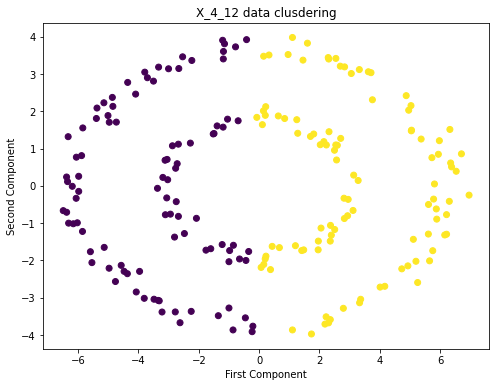

In [93]:
k_means_clusters_x = KMeans(n_clusters=2).fit_predict(df_x)
draw_clusters(res_pca_x[:, 0], res_pca_x[:, 1],k_means_clusters_x)

In [161]:
print('Modularity =', compute_modularity(G_x, k_means_clusters_x))

Modularity = 0.46661050997989617


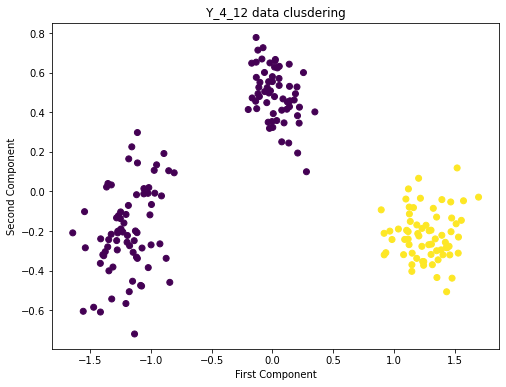

In [94]:
k_means_clusters_y = KMeans(n_clusters=2).fit_predict(df_y)
draw_clusters(res_pca_y[:, 0], res_pca_y[:, 1],k_means_clusters_y, distribution="Y")

In [153]:
print('Modularity =', compute_modularity(G_y, k_means_clusters_y))

Modularity = 0.4961736900027383


In [73]:
df_x.head()

,0,1,2,3
0,0.713168,-1.155396,4.892525,-4.179356
1,0.180207,-0.951694,3.215496,-3.035290
2,-0.160125,-1.056572,2.849464,-3.009590
3,0.135208,-0.901885,2.976070,-2.840862
4,0.951132,-0.891886,4.577923,-3.626791


### EM algorithm

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


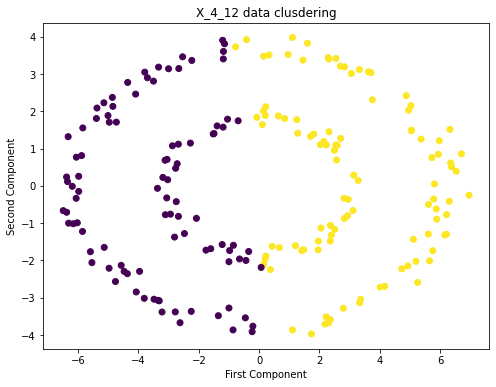

In [95]:
from sklearn.mixture import GaussianMixture
em_clusters_x = GaussianMixture(n_components=2, 
                             max_iter=300,
                             covariance_type="full").fit_predict(df_x)
print(em_clusters_x)
draw_clusters(res_pca_x[:, 0], res_pca_x[:, 1],em_clusters_x)

In [141]:
print('Modularity =', compute_modularity(G_x, em_clusters_x))

Modularity = 0.46045037889964613


[1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1
 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0]


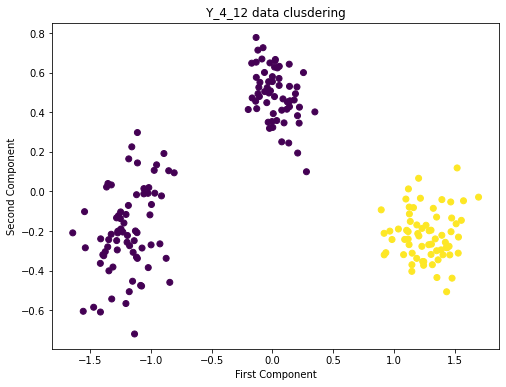

In [97]:
from sklearn.mixture import GaussianMixture
em_clusters_y = GaussianMixture(n_components=2, 
                             max_iter=300,
                             covariance_type="full").fit_predict(df_y)
print(em_clusters_y)
draw_clusters(res_pca_y[:, 0], res_pca_y[:, 1],k_means_clusters_y, distribution="Y")

In [142]:
print('Modularity =', compute_modularity(G_y, em_clusters_y))

Modularity = 0.3710325578101632


### Single Linkage

In [104]:
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

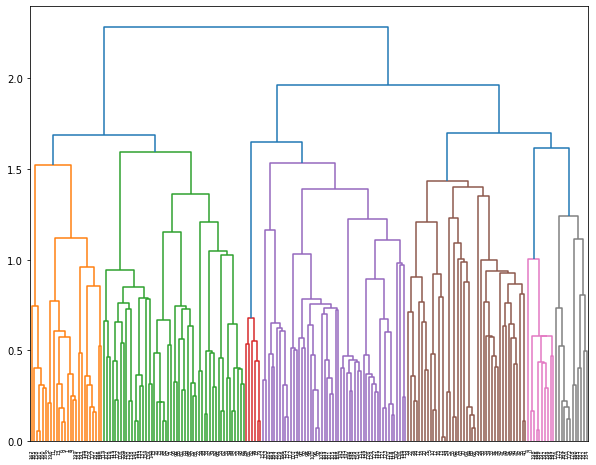

In [105]:
dendrogram_x = linkage(x_sim_matrix, 'single')
fig = plt.figure(figsize=(10, 8))
_ = dendrogram(dendrogram_x)
plt.show()

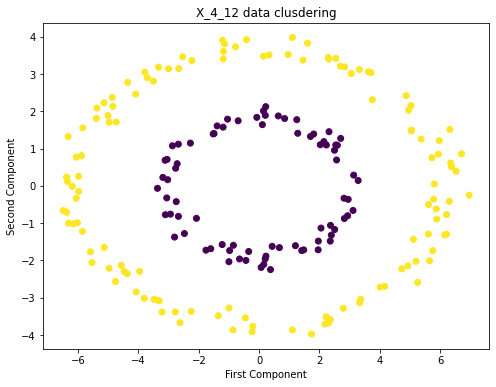

In [107]:
singlelinkage_clusters_x = fcluster(dendrogram_x, 2, criterion='distance')
draw_clusters(res_pca_x[:, 0], res_pca_x[:, 1],singlelinkage_clusters_x)

In [115]:
print('Modularity =', compute_modularity(G_x, singlelinkage_clusters_x))

Modularity = 0.47774514266890533


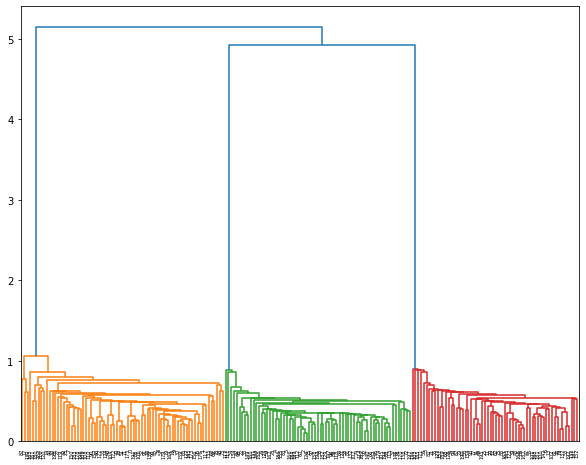

In [116]:
dendrogram_y = linkage(y_sim_matrix, 'single')
fig = plt.figure(figsize=(10, 8))
_ = dendrogram(dendrogram_y)
plt.show()

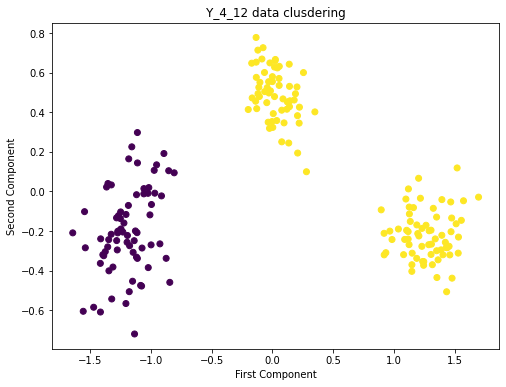

In [117]:
singlelinkage_clusters_y = fcluster(dendrogram_y, 5, criterion='distance')
draw_clusters(res_pca_y[:, 0], res_pca_y[:, 1],singlelinkage_clusters_y, distribution="Y")

In [118]:
print('Modularity =', compute_modularity(G_y, singlelinkage_clusters_y))

Modularity = 0.3710325578101632


### Spectral algorithm

[1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0]


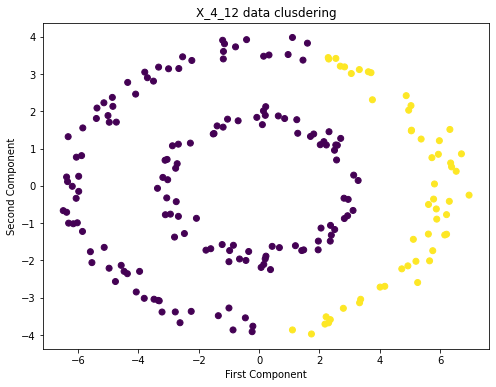

In [143]:
from sklearn.cluster import SpectralClustering
spectral_clustering_x = SpectralClustering(n_clusters=2,
                                assign_labels='discretize',
                                affinity='precomputed',
                                random_state=11).fit_predict(x_sim_matrix)
print(spectral_clustering_x)
draw_clusters(res_pca_x[:, 0], res_pca_x[:, 1],spectral_clustering_x)

[1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0
 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1
 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0
 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0]


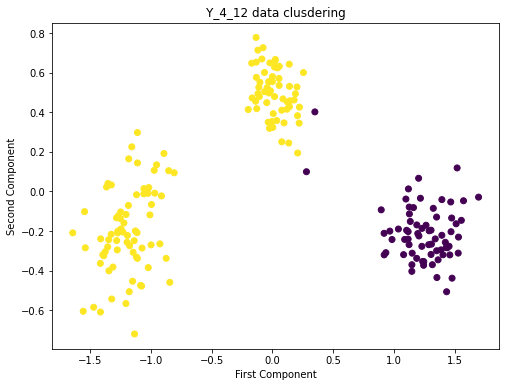

In [144]:
spectral_clustering_y = SpectralClustering(n_clusters=2,
                                assign_labels='discretize',
                                affinity='precomputed',
                                random_state=11).fit_predict(y_sim_matrix)
print(spectral_clustering_y)
draw_clusters(res_pca_y[:, 0], res_pca_y[:, 1],spectral_clustering_y, distribution="Y")

In [140]:
from sklearn.metrics.cluster import rand_score
import itertools
algorithms_results = {
    "EM": em_clusters_x,
    "Single Linkage": singlelinkage_clusters_x,
    "K Means": k_means_clusters_x,
    "Spectral": spectral_clustering_x,
}
combinations = itertools.combinations(algorithms_results, 2)
print("Rand Score Computation for Clusterization into 2 clusters\n")
for algo_name_1, algo_name_2 in list(combinations):
    score = rand_score(algorithms_results[algo_name_1], algorithms_results[algo_name_2])
    print(f"Rand Score between {algo_name_1} and {algo_name_2} is {score}")

Rand Score Computation for Clusterization into 2 clusters

Rand Score between EM and Single Linkage is 0.49874371859296485
Rand Score between EM and K Means is 0.9703015075376884
Rand Score between EM and Spectral is 0.618140703517588
Rand Score between Single Linkage and K Means is 0.5007035175879397
Rand Score between Single Linkage and Spectral is 0.542713567839196
Rand Score between K Means and Spectral is 0.6231155778894473


## 2. Clustering for the number of clusters k = 3

### k-means

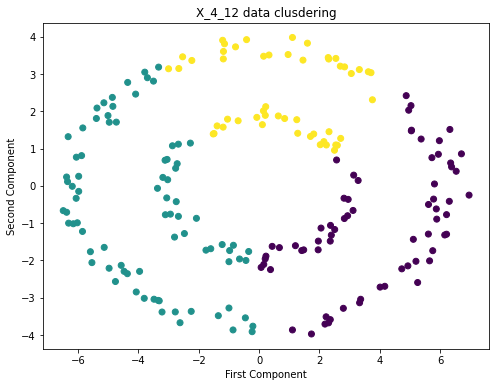

In [145]:
k_means_clusters_x = KMeans(n_clusters=3).fit_predict(df_x)
draw_clusters(res_pca_x[:, 0], res_pca_x[:, 1],k_means_clusters_x)

In [146]:
print('Modularity =', compute_modularity(G_x, k_means_clusters_x))

Modularity = 0.6026975955529922


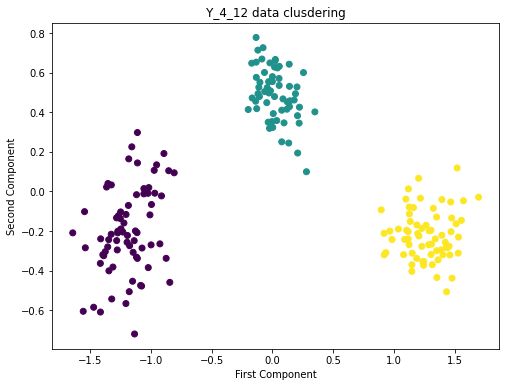

In [147]:
k_means_clusters_y = KMeans(n_clusters=3).fit_predict(df_y)
draw_clusters(res_pca_y[:, 0], res_pca_y[:, 1],k_means_clusters_y, distribution="Y")

In [168]:
print('Modularity =', compute_modularity(G_y, k_means_clusters_y))

Modularity = 0.49617369000273837


### EM

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


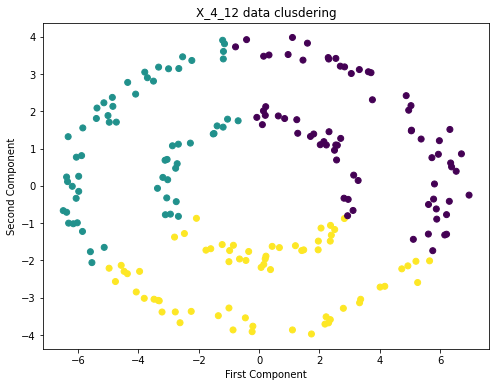

In [151]:
from sklearn.mixture import GaussianMixture
em_clusters_x_3 = GaussianMixture(n_components=3, 
                             max_iter=300,
                             covariance_type="full").fit_predict(df_x)
print(em_clusters_x_3)
draw_clusters(res_pca_x[:, 0], res_pca_x[:, 1], em_clusters_x_3)

[0 0 1 2 1 1 2 0 0 0 0 2 2 2 0 1 0 0 0 0 2 2 1 0 1 2 0 0 1 2 0 2 0 1 2 2 1
 1 1 2 0 1 0 2 0 1 0 2 0 2 2 0 0 2 1 2 2 0 0 1 1 2 2 0 1 0 1 2 2 0 0 0 1 0
 1 2 2 2 0 2 2 1 1 1 2 2 0 0 1 1 0 0 1 2 2 0 1 1 1 0 2 2 2 2 0 1 0 1 0 0 0
 1 1 1 1 1 0 0 1 0 0 1 2 2 0 1 1 0 2 1 0 1 1 2 1 0 2 2 1 0 1 2 2 2 1 0 1 1
 2 1 0 2 2 0 2 1 0 0 1 0 1 0 1 2 0 0 1 1 2 1 1 2 0 0 1 0 0 0 0 0 0 2 1 0 1
 2 1 2 1 2 2 0 2 1 1 2 0 1 0 1]


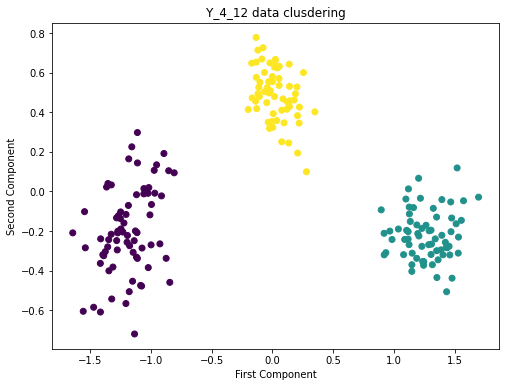

In [152]:
em_clusters_y_3 = GaussianMixture(n_components=3, 
                             max_iter=300,
                             covariance_type="full").fit_predict(df_y)
print(em_clusters_y_3)
draw_clusters(res_pca_y[:, 0], res_pca_y[:, 1], em_clusters_y_3, "Y")

### Single Linkage

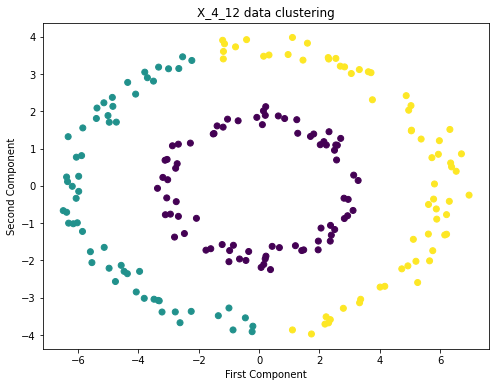

In [117]:
singlelinkage_clusters_x = fcluster(dendrogram_x, 1.9, criterion='distance')
plt.figure(figsize=(8, 6))
plt.scatter(res_pca_x[:, 0], res_pca_x[:, 1], c=singlelinkage_clusters_x)
plt.title("X_4_12 data clustering")
plt.ylabel('Second Component')
plt.xlabel('First Component')
plt.show()

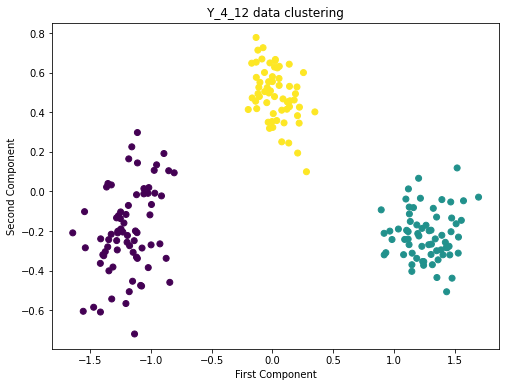

In [118]:
singlelinkage_clusters_y = fcluster(dendrogram_y, 4, criterion='distance')
plt.figure(figsize=(8, 6))
plt.scatter(res_pca_y[:, 0], res_pca_y[:, 1], c=singlelinkage_clusters_y)
plt.title("Y_4_12 data clustering")
plt.ylabel('Second Component')
plt.xlabel('First Component')
plt.show()

### Spectral algorithm

[2 2 2 2 1 1 2 2 2 2 1 2 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1
 1 2 2 1 1 2 1 1 1 1 1 2 2 2 1 2 2 1 1 2 1 2 2 1 2 2 1 1 1 1 2 2 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 2 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0
 0 0 2 2 2 2 0 0 0 0 0 2 0 2 0 0 0 2 0 2 0 0 2 0 0 0 2 2 2 2 2 0 0 2 0 0 0
 0 0 0 0 0 0 2 0 0 0 2 0 2 2 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


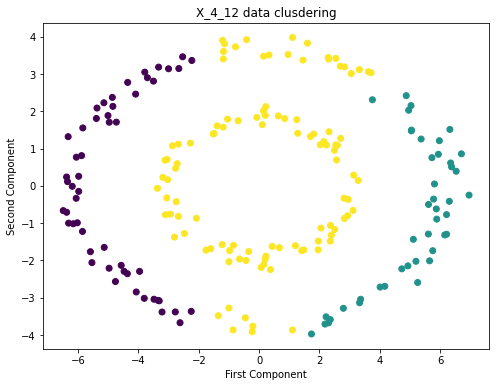

In [155]:
spectral_clustering_x_3 = SpectralClustering(n_clusters=3,
                                assign_labels='discretize',
                                affinity='precomputed',
                                random_state=11).fit_predict(x_sim_matrix)
print(spectral_clustering_x_3)
draw_clusters(res_pca_x[:, 0], res_pca_x[:, 1],spectral_clustering_x_3)

[1 1 0 2 0 0 2 1 1 1 1 2 2 2 1 0 1 1 1 1 2 2 0 1 0 2 1 1 0 2 1 2 1 0 2 2 0
 0 0 2 1 0 1 2 1 0 1 2 1 2 2 1 1 2 0 2 2 1 1 0 0 2 2 1 0 1 0 2 2 1 1 1 0 1
 0 2 2 2 1 2 2 0 0 0 2 2 1 1 0 0 1 1 0 2 2 1 0 0 0 1 2 2 2 2 1 0 1 0 1 1 1
 0 0 0 0 0 1 1 0 1 1 0 2 2 1 0 0 1 2 0 1 0 0 2 0 1 2 2 0 1 0 2 2 2 0 1 0 0
 2 0 1 2 2 1 2 0 1 1 0 1 0 1 0 2 1 1 0 0 2 0 0 2 1 1 0 1 1 1 1 1 1 2 0 1 0
 2 0 2 0 2 2 1 2 0 0 2 1 0 1 0]


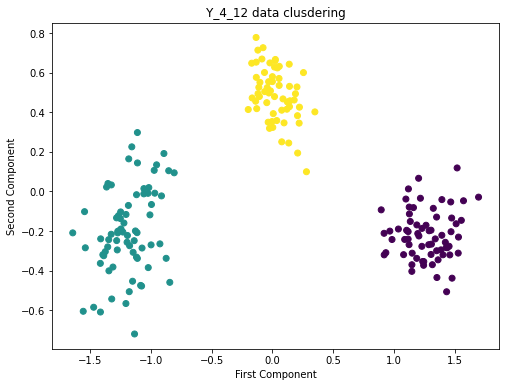

In [156]:
spectral_clustering_y_3= SpectralClustering(n_clusters=3,
                                assign_labels='discretize',
                                affinity='precomputed',
                                random_state=11).fit_predict(y_sim_matrix)
print(spectral_clustering_y_3)
draw_clusters(res_pca_y[:, 0], res_pca_y[:, 1],spectral_clustering_y_3, distribution="Y")

In [158]:
print("Rand Score Computation for Clusterization into 3 clusters\n")
combinations = itertools.combinations(algorithms_results, 2)
for algo_name_1, algo_name_2 in list(combinations):
    score = rand_score(algorithms_results[algo_name_1], algorithms_results[algo_name_2])
    print(f"Rand Score between {algo_name_1} and {algo_name_2} is {score}")

Rand Score Computation for Clusterization into 3 clusters

Rand Score between EM and Single Linkage is 0.49874371859296485
Rand Score between EM and K Means is 0.9703015075376884
Rand Score between EM and Spectral is 0.618140703517588
Rand Score between Single Linkage and K Means is 0.5007035175879397
Rand Score between Single Linkage and Spectral is 0.542713567839196
Rand Score between K Means and Spectral is 0.6231155778894473


## 3.1 Search for the number of clusters

### Scree plot

In [73]:
def scree_plot(df, title):
    inertia = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k).fit(df)
        inertia.append(kmeans.inertia_)
#     for i in range(0, len(inertia) -2):
#         print(inertia[i] / inertia[i + 1])
    plt.figure(figsize=(10, 8))
    plt.plot(range(1, 10), inertia, marker='s');
    plt.xlabel('Number of clusters')
    plt.ylabel('Compactness')
    plt.title('Scree plot of ' + title)
    plt.show()

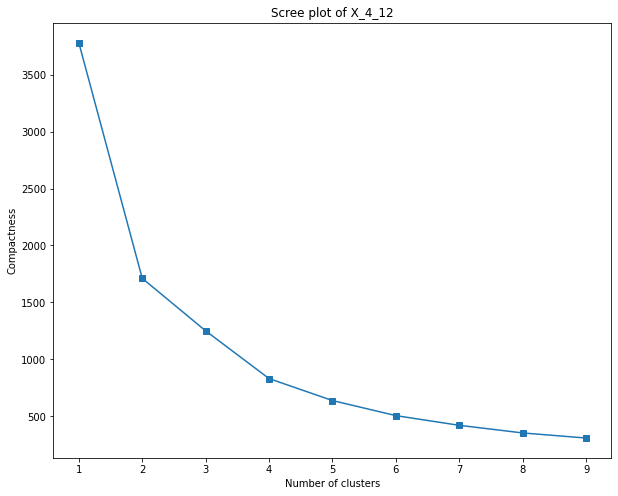

In [74]:
scree_plot(df_x, 'X_4_12')

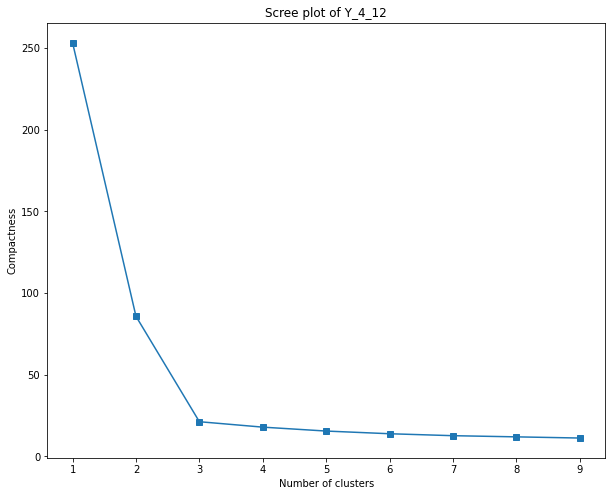

In [75]:
scree_plot(df_y, 'Y_4_12')